## 1. NLTK 모듈 로딩
 - 불용어 목록(stopwords)
 - 정규식 Tokenizer
 - 문장/단어 Tokenizer
 - 형태소 분석(pos_tag)

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

## 2. 분석 대상 데이터 로딩
 - 분석 대상: trumph.txt
 - 불용어 목록: eng_stop_word.txt

In [2]:
raw_data = open('../../data/trumph.txt').read()
stop_word_list = open('../../resource/eng_stop_word.txt').read()

## 3. 데이터 분석
 - 입력 데이터를 문장, 단어별 분류
 - 필터링
    - 1. 1글자 이상, 10글자 미만
    - 2. 불용어 제거
    - 3. 명사구, 동사구 이외의 단어 제거

In [3]:
target_word_list = []

sentences = sent_tokenize(raw_data)
for sent in sentences:
    tagged_list = pos_tag(word_tokenize(sent))
    
    for tagword in tagged_list:
        if ( len(tagword[0]) > 1 and len(tagword[0]) < 10 
            and ( tagword[0] not in stopwords.words() )  
            and ( tagword[0] not in stop_word_list )
            and ( tagword[1][0] == 'N' or tagword[1][0] == 'V' ) ) :
                target_word_list.append(tagword[0])

print(target_word_list)

['President', 'United', 'States', 'Iran', 'allowed', 'weapon', 'morning', "'m", 'inform', 'Americans', 'harmed', 'night', 'attack', 'regime', 'suffered', 'soldiers', 'damage', 'sustained', 'bases', 'forces', 'Iran', 'appears', 'standing', 'parties', 'concerned', 'world', 'American', 'Iraqi', 'lives', 'lost', 'dispersal', 'forces', 'warning', 'system', 'worked', 'salute', 'skill', 'courage', 'America', 'women', 'uniform', 'nations', 'tolerated', 'Iran', 'behavior', 'Middle', 'East', 'days', 'Iran', 'leading', 'sponsor', 'terrorism', 'pursuit', 'weapons', 'threatens', 'world', 'happen', 'week', 'action', 'stop', 'terrorist', 'lives', 'direction', 'United', 'States', 'world', 'terrorist', 'Qasem', 'Soleimani', 'head', 'Quds', 'Force', 'Soleimani', 'trained', 'armies', 'including', 'Hezbollah', 'launching', 'strikes', 'targets', 'fueled', 'wars', 'region', 'wounded', 'murdered', 'thousands', 'U.S.', 'troops', 'including', 'planting', 'roadside', 'bombs', 'maim', 'dismember', 'victims', 'So

## 4. 단어 카운팅

In [4]:
from collections import Counter
cnt_filtered_token_data = dict(Counter(target_word_list).most_common(100))

print(cnt_filtered_token_data)

{'Iran': 20, 'world': 7, 'United': 6, 'ISIS': 6, 'States': 5, 'America': 5, 'Middle': 5, 'East': 5, 'Soleimani': 5, 'U.S.': 5, 'deal': 5, 'regime': 4, 'American': 4, 'lives': 3, 'including': 3, 'killed': 3, 'death': 3, 'missiles': 3, 'Thank': 3, 'allowed': 2, 'night': 2, 'forces': 2, 'nations': 2, 'tolerated': 2, 'behavior': 2, 'days': 2, 'terrorism': 2, 'terrorist': 2, 'targets': 2, 'wounded': 2, 'thousands': 2, 'attacks': 2, 'Iraq': 2, 'message': 2, 'options': 2, 'sanctions': 2, 'months': 2, 'fired': 2, 'signed': 2, 'chanted': 2, 'fact': 2, 'terror': 2, 'country': 2, 'place': 2, 'JCPOA': 2, 'work': 2, 'oil': 2, 'caliphate': 2, 'future': 2, 'President': 1, 'weapon': 1, 'morning': 1, "'m": 1, 'inform': 1, 'Americans': 1, 'harmed': 1, 'attack': 1, 'suffered': 1, 'soldiers': 1, 'damage': 1, 'sustained': 1, 'bases': 1, 'appears': 1, 'standing': 1, 'parties': 1, 'concerned': 1, 'Iraqi': 1, 'lost': 1, 'dispersal': 1, 'warning': 1, 'system': 1, 'worked': 1, 'salute': 1, 'skill': 1, 'courage'

## 5. 다빈도 단어 시각화

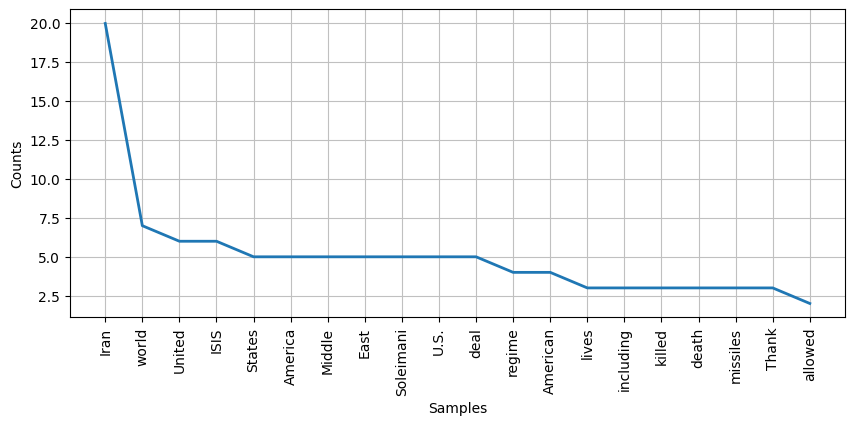

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 4))

g_data = nltk.Text(target_word_list, name = '다빈도 단어 그래프')
g_data.plot(20)

## 6. 워드 클라우드 시각화

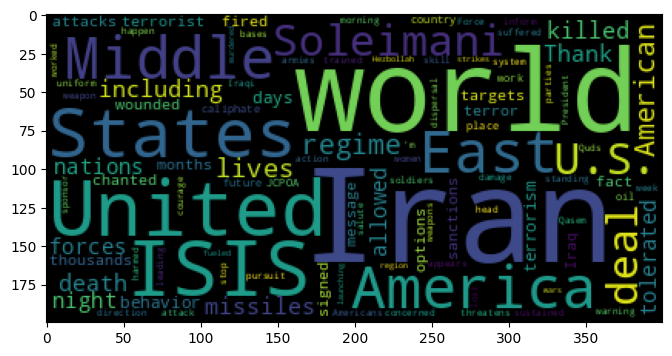

In [6]:
from wordcloud import WordCloud

wordcloud = WordCloud(relative_scaling = 0.2, background_color = 'black').generate_from_frequencies(cnt_filtered_token_data)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()